In [1]:
# Data processing
import iris
import iris.analysis
import numpy as np
from pathlib import Path
# Visualization
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default'] = 'regular'

In [2]:
# Choose experiment
exp = 'xnvtj'
path_to_ukca = Path(f'../data/{exp}')
# Load preprocessed variables
airmass = iris.load_cube(str(path_to_ukca)+f'/{exp}_airmass.nc')
o3 = iris.load_cube(str(path_to_ukca)+f'/{exp}_o3.nc')
ch4 = iris.load_cube(str(path_to_ukca)+f'/{exp}_ch4.nc')
no = iris.load_cube(str(path_to_ukca)+f'/{exp}_no.nc')
no2 = iris.load_cube(str(path_to_ukca)+f'/{exp}_no2.nc')
hno3 = iris.load_cube(str(path_to_ukca)+f'/{exp}_hno3.nc')
pan = iris.load_cube(str(path_to_ukca)+f'/{exp}_pan.nc')
ppan = iris.load_cube(str(path_to_ukca)+f'/{exp}_ppan.nc')
meono2 = iris.load_cube(str(path_to_ukca)+f'/{exp}_meono2.nc')
etono2 = iris.load_cube(str(path_to_ukca)+f'/{exp}_etono2.nc')
prono2 = iris.load_cube(str(path_to_ukca)+f'/{exp}_prono2.nc')

In [3]:
# Path to figures
path_to_figs = Path('../../../results') / exp / 'burden'
path_to_figs.mkdir(exist_ok=True) # create a new folder if it doesn't exist

#### Calculate whole atmosphere burdens

In [4]:
o3_burden_whole_atm = (o3*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)
ch4_burden_whole_atm = (ch4*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)
no_burden_whole_atm = (no*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)
no2_burden_whole_atm = (no2*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)
hno3_burden_whole_atm = (hno3*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)
pan_burden_whole_atm = (pan*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)
ppan_burden_whole_atm = (ppan*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)
meono2_burden_whole_atm = (meono2*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)
etono2_burden_whole_atm = (etono2*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)
prono2_burden_whole_atm = (prono2*airmass).collapsed(['model_level_number', 'longitude', 'latitude'], iris.analysis.SUM)

/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/cube.py:3180: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'model_level_number'.
  warnings.warn(msg.format(self.name()))
/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


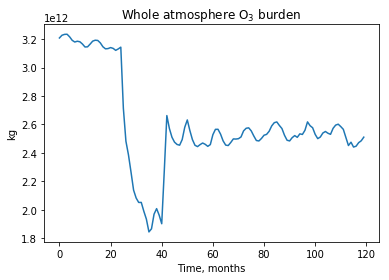

In [5]:
plt.plot(o3_burden_whole_atm.data)
plt.title('Whole atmosphere $O_3$ burden')
plt.xlabel('Time, months')
plt.ylabel('kg')
plt.savefig(path_to_figs / f'{exp}_whole_atm_burden_o3.png')

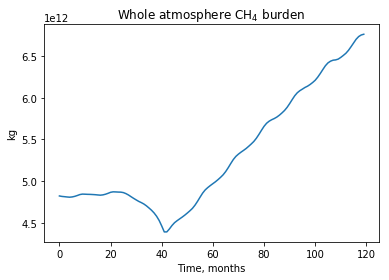

In [6]:
plt.plot(ch4_burden_whole_atm.data)
plt.title('Whole atmosphere $CH_4$ burden')
plt.xlabel('Time, months')
plt.ylabel('kg')
plt.savefig(path_to_figs / f'{exp}_whole_atm_burden_ch4.png');

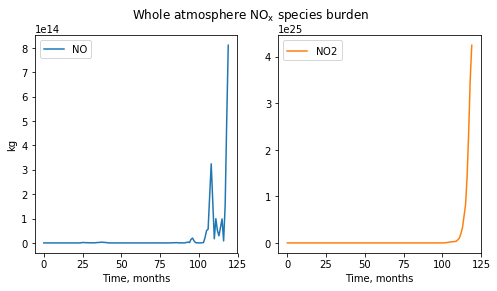

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].plot(no_burden_whole_atm.data, label='NO', color='C0')
ax[1].plot(no2_burden_whole_atm.data, label='$NO2$', color='C1')
ax[0].set_ylabel('kg')
fig.suptitle('Whole atmosphere $NO_x$ species burden')
for iax in ax.flatten():
    iax.set_xlabel('Time, months')
    iax.legend()
fig.savefig(path_to_figs / f'{exp}_whole_atm_burden_nox_species.png')

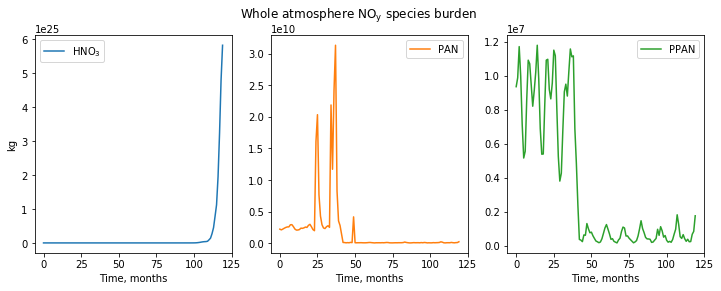

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].plot(hno3_burden_whole_atm.data, label='$HNO_3$', color='C0')
ax[1].plot(pan_burden_whole_atm.data, label='PAN', color='C1')
ax[2].plot(ppan_burden_whole_atm.data, label='PPAN', color='C2')
ax[0].set_ylabel('kg')
fig.suptitle('Whole atmosphere $NO_y$ species burden')
for iax in ax.flatten():
    iax.set_xlabel('Time, months')
    iax.legend()
fig.savefig(path_to_figs / f'{exp}_whole_atm_burden_noy_species.png')

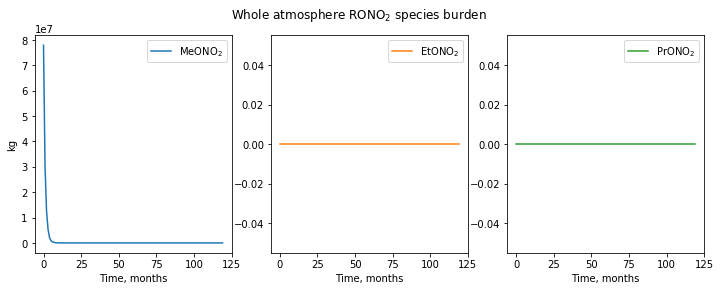

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].plot(meono2_burden_whole_atm.data, label='$MeONO_2$', color='C0')
ax[1].plot(etono2_burden_whole_atm.data, label='$EtONO_2$', color='C1')
ax[2].plot(prono2_burden_whole_atm.data, label='$PrONO_2$', color='C2')
ax[0].set_ylabel('kg')
fig.suptitle('Whole atmosphere $RONO_2$ species burden')
for iax in ax.flatten():
    iax.set_xlabel('Time, months')
    iax.legend()
fig.savefig(path_to_figs / f'{exp}_whole_atm_burden_rono2_species.png')

#### Calculate tropospheric burdens

In [10]:
M_air = 28.97 # molar mass of dry air [kg]
coeff_o3 = (M_air/48.00)*1e9
# Define chemical troposphere as one where ozone mixing ratio is < 120 ppbv
o3_tropo = o3.copy(np.ma.masked_less(o3.data*coeff_o3, 120))
o3_burden_tropo = (o3_tropo*airmass).collapsed(['longitude', 'latitude', 'model_level_number'], iris.analysis.SUM)

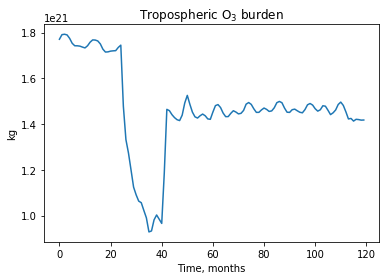

In [11]:
plt.plot(o3_burden_tropo.data)
plt.title('Tropospheric $O_3$ burden')
plt.xlabel('Time, months')
plt.ylabel('kg');